# Examples of the EMI paper
In this Jupyter notebook are replicated the case studies withthe code and graph from the EMI paper (TODO add DOI).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from datetime import datetime
import pandas as pd
sys.path.append('../src')
from emagpy import Problem

datadir = 'examples/'
outputdir = 'figures/'

letters = ['a','b','c','d','e','f','g','h','i','j']

In [30]:
# parameters for the synthetic model

#case 1a

conds = np.ones((100,2))*np.arange(100)[:,None]+1
depths = np.ones((100,1))*1

k1 = Problem()
k1.setModels([depths],[conds])

dfs = k1.forward(forwardModel='FS', coils=['VCP1.48f10000h0'])
dfs2 = k1.forward(forwardModel='CS', coils=['VCP1.48f10000h0'])

dfs
k1.surveys[0].df

Forward modelling
Forward modelling


TypeError: '(1, slice(None, None, None))' is an invalid key

## CS vs Maxwell on synthetic conductive models - Paul 
- Graph 1: homogeneous conductivity increase (X) vs apparent modelled (Y) for CS and FS 
- Graph 2: different height (X) vs apparent modelled (Y) for CS and FS 

In [1]:
# parameters for the synthetic model

#case 1a

conds = np.ones((100,2))*np.arange(100)[:,None]+1
depths = np.ones((100,1))*1

k1 = Problem()
k1.setModels([depths],[conds])

dfs = k1.forward(forwardModel='FS', coils=['VCP1.48f10000h0'])
dfs2 = k1.forward(forwardModel='CS', coils=['VCP1.48f10000h0'])

dfs
k1.surveys[0].df

eca_fs = np.zeros((len(conds),2))
eca_cs = np.zeros((len(conds),2))
eca_lin = np.zeros((len(conds),2))
for i in range(0, len(conds)):
   
    eca_fs[i,] = fMaxwellQ(cond=np.array([conds[i],conds[i]]),
                    depths=np.array([1]),
                    s=np.array([1.48,4.49]),
                    cpos=np.array(['vcp','hcp']),hx=1) 
    
    eca_lin[i,] = fMaxwellECa(cond=np.array([conds[i],conds[i]]),
                      depths=np.array([1]),
                      s=np.array([1.48,4.49]),
                      cpos=np.array(['vcp','hcp']),hx=1) 
    
    eca_cs[i,] = fCS(cond=np.array([conds[i],conds[i]]),
                     depths=np.array([1]),
                    s=np.array([1.48,4.49]),
                    cpos=np.array(['vcp','hcp']),hx=1) 
    
plt.plot(conds,eca_fs[...,0], label = "FS-ECa (1.48 m VCP)")
#plt.plot(conds,eca_fs[...,1], label = "FS-ECa (4.49 m HCP)")
plt.plot(conds,eca_cs[...,0], label = "CS-ECa (1.48 m VCP)")
#plt.plot(conds,eca_cs[...,1], label = "CS-ECa (4.49 m HCP)")
plt.plot(conds,eca_lin[...,0], label = "LIN-ECa (1.48 m VCP)")
#plt.plot(conds,eca_lin[...,1], label = "LIN-ECa (4.49 m HCP)")
plt.xlabel('Ground Conductivity (mS/m)') 
plt.ylabel('ECa (mS/m)') 
plt.legend()

plt.show()

#case 1b
lyr1_conds = np.arange(1,100,1)
eca_fs = np.zeros((len(conds),2))
eca_cs = np.zeros((len(conds),2))
eca_lin = np.zeros((len(conds),2))
for i in range(0, len(conds)):
   
    eca_fs[i,] = fMaxwellQ(cond=np.array([conds[i],10]),
                    depths=np.array([1]),
                    s=np.array([1.48,4.49]),
                    cpos=np.array(['vcp','hcp']),hx=1) 
    
    eca_lin[i,] = fMaxwellECa(cond=np.array([conds[i],10]),
                      depths=np.array([1]),
                      s=np.array([1.48,4.49]),
                      cpos=np.array(['vcp','hcp']),hx=1) 
    
    eca_cs[i,] = fCS(cond=np.array([conds[i],10]),
                     depths=np.array([1]),
                    s=np.array([1.48,4.49]),
                    cpos=np.array(['vcp','hcp']),hx=1) 
    
plt.plot(conds,eca_fs[...,0], label = "FS-ECa (1.48 m VCP)")
#plt.plot(conds,eca_fs[...,1], label = "FS-ECa (4.49 m HCP)")
plt.plot(conds,eca_cs[...,0], label = "CS-ECa (1.48 m VCP)")
#plt.plot(conds,eca_cs[...,1], label = "CS-ECa (4.49 m HCP)")
plt.plot(conds,eca_lin[...,0], label = "LIN-ECa (1.48 m VCP)")
#plt.plot(conds,eca_lin[...,1], label = "LIN-ECa (4.49 m HCP)")
plt.xlabel('Layer 1 Conductivity (mS/m)') 
plt.ylabel('ECa (mS/m)') 
plt.legend()

plt.show()

#case 1c
heights = np.arange(0,2.1,0.1)
eca_fs = np.zeros((len(heights),2))
eca_cs = np.zeros((len(heights),2))
eca_lin = np.zeros((len(heights),2))
for i in range(0, len(heights)):
   
    eca_fs[i,] = fMaxwellQ(cond=np.array([10,10]),
                    depths=np.array([1]),
                    s=np.array([1.48,4.49]),
                    cpos=np.array(['vcp','hcp']),hx=heights[i]) 
    
    eca_lin[i,] = fMaxwellECa(cond=np.array([10,10]),
                      depths=np.array([1]),
                      s=np.array([1.48,4.49]),
                      cpos=np.array(['vcp','hcp']),hx=heights[i]) 
    
    eca_cs[i,] = fCS(cond=np.array([10,10]),
                     depths=np.array([1]),
                    s=np.array([1.48,4.49]),
                    cpos=np.array(['vcp','hcp']),hx=heights[i]) 
    
plt.plot(heights,eca_fs[...,0], label = "FS-ECa (1.48 m VCP)")
#plt.plot(heights,eca_fs[...,1], label = "FS-ECa (4.49 m HCP)")
plt.plot(heights,eca_cs[...,0], label = "CS-ECa (1.48 m VCP)")
#plt.plot(heights,eca_cs[...,1], label = "CS-ECa (4.49 m HCP)")
plt.plot(heights,eca_lin[...,0], label = "LIN-ECa (1.48 m VCP)")
#plt.plot(heights,eca_lin[...,1], label = "LIN-ECa (4.49 m HCP)")
plt.xlabel('Height (m)') 
plt.ylabel('ECa (mS/m)') 
plt.legend()

plt.show()

#case 1d
heights = np.arange(0,2.1,0.1)
eca_fs = np.zeros((len(heights),2))
eca_cs = np.zeros((len(heights),2))
eca_lin = np.zeros((len(heights),2))
for i in range(0, len(heights)):
   
    eca_fs[i,] = fMaxwellQ(cond=np.array([50,10]),
                    depths=np.array([1]),
                    s=np.array([1.48,4.49]),
                    cpos=np.array(['vcp','hcp']),hx=heights[i]) 
    
    eca_lin[i,] = fMaxwellECa(cond=np.array([50,10]),
                      depths=np.array([1]),
                      s=np.array([1.48,4.49]),
                      cpos=np.array(['vcp','hcp']),hx=heights[i]) 
    
    eca_cs[i,] = fCS(cond=np.array([50,10]),
                     depths=np.array([1]),
                    s=np.array([1.48,4.49]),
                    cpos=np.array(['vcp','hcp']),hx=heights[i]) 
    
plt.plot(heights,eca_fs[...,0], label = "FS-ECa (1.48 m VCP)")
#plt.plot(heights,eca_fs[...,1], label = "FS-ECa (4.49 m HCP)")
plt.plot(heights,eca_cs[...,0], label = "CS-ECa (1.48 m VCP)")
#plt.plot(heights,eca_cs[...,1], label = "CS-ECa (4.49 m HCP)")
plt.plot(heights,eca_lin[...,0], label = "LIN-ECa (1.48 m VCP)")
#plt.plot(heights,eca_lin[...,1], label = "LIN-ECa (4.49 m HCP)")
plt.xlabel('Height (m)') 
plt.ylabel('ECa (mS/m)') 
plt.legend()

plt.show()

/home/pmclachlan/emagpy/src/emagpy


NameError: name 'np' is not defined

## Calibrated and not calibrated (Boxford ERT line) - Paul

In [23]:
eca_fs[...,0]

array([ 0.32288609,  0.64017193,  0.95386919,  1.2646952 ,  1.57306422,
        1.87925558,  2.18347425,  2.4858789 ,  2.78659713,  3.08573444,
        3.38337993,  3.67961018,  3.97449191,  4.26808393,  4.56041672,
        4.85160006,  5.14161925,  5.43052638,  5.71835958,  6.00515139,
        6.29093181,  6.57572866,  6.85956785,  7.14247354,  7.42446837,
        7.70557358,  7.98580916,  8.265194  ,  8.54374592,  8.82148182,
        9.09841774,  9.37456893,  9.6499499 ,  9.92457451, 10.19845597,
       10.47160693, 10.74403951, 11.01576532, 11.28679549, 11.55714073,
       11.82681135, 12.09581726, 12.364168  , 12.6318728 , 12.89894055,
       13.16537984, 13.43119897, 13.69640597, 13.96100864, 14.2250145 ,
       14.48843086, 14.75126481, 15.01352322, 15.27521278, 15.53633997,
       15.7969111 , 16.05693231, 16.31640958, 16.57534871, 16.83375537,
       17.09163508, 17.34899321, 17.60583502, 17.86216562, 18.11799001,
       18.37331307, 18.62813956, 18.88247414, 19.13632137, 19.38

## Sharp and smooth inversions on Boxford transect/Devon’s data on saprolite for interface - Guillaume 

In [5]:
k1 = Problem()
k1.createSurvey(datadir + 'saprolite/regolith.csv')
k1.convertFromNMEA()
k1.setInit(depths0=np.linspace(0.05, 2, 10))
k1.invertGN()

k2 = Problem()
k2.createSurvey(datadir + 'saprolite/regolith.csv')
k2.convertFromNMEA()
k2.setInit(depths0=np.array([0.5]), fixedDepths=[False])
k2.invert(method='ROPE')

/home/pmclachlan/.local/lib/python3.6/site-packages/pyproj/crs/crs.py:279: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)
/home/pmclachlan/.local/lib/python3.6/site-packages/pyproj/crs/crs.py:279: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)
/home/pmclachlan/.local/lib/python3.6/site-packages/pyproj/crs/crs.py:279: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, 

Survey 1/1
31 measurements inverted
bounds = [(0.2, 0.7), (2.0, 100.0), (2.0, 100.0)]
Survey 1/1
31 measurements inverted (31 converged)


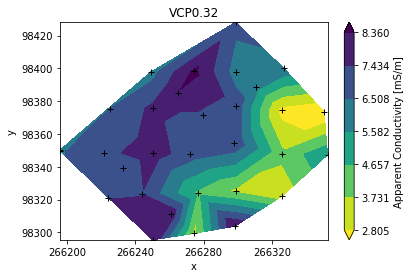

In [3]:
fig, ax = plt.subplots()
k1.showMap(contour=True, pts=True, ax=ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

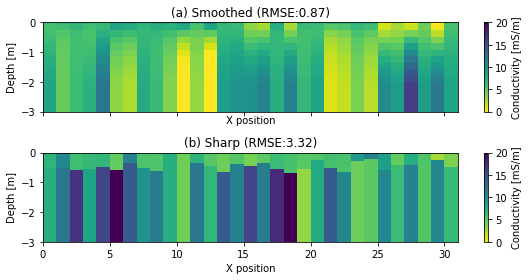

In [4]:
# graph
fig, axs = plt.subplots(2, 1, figsize=(8,4), sharex=True, sharey=True)
ax = axs[0]
k1.showResults(ax=ax, vmin=0, vmax=20, maxDepth=3)
rmse = k1.getRMSE()['all'].values[0]
ax.set_title('(a) Smoothed (RMSE:{:.2f})'.format(rmse))
ax = axs[1]
k2.showResults(ax=ax, vmin=0, vmax=20, maxDepth=3)
rmse = k2.getRMSE()['all'].values[0]
ax.set_title('(b) Sharp (RMSE:{:.2f})'.format(rmse))
fig.savefig(outputdir + 'smooth-sharp.jpg', dpi=500)
# TODO add true depth from sampling ?

## Effect of noise and height on the inversion - Guillaume
- Similar to Paul’s thesis graph: adding noise make the inversion less reliable 
- Graph with increasing noise level on a 2D model ? 

/usr/lib/python3/dist-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


Forward modelling
Forward modelling
Forward modelling
Forward modelling


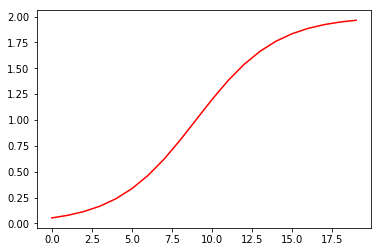

In [2]:
# parameters for the synthetic model
nlayer = 2
npos = 20
conds = np.ones((npos, nlayer))*[20, 100]
x = np.linspace(0.1, 2, npos)[:,None]
depths = 0 + 2/(1+np.exp(-4*(x-1)))
fig, ax = plt.subplots()
ax.plot(depths, 'r-')
fig.show()

#coils0 = ['VCP0.32', 'VCP0.71', 'VCP1.18', 'HCP0.32', 'HCP0.71', 'HCP1.18']
#coils1 = ['VCP0.32f30000h1', 'VCP0.71f30000h1', 'VCP1.18f30000h1',
#         'HCP0.32f30000h1', 'HCP0.71f30000h1', 'HCP1.18f30000h1']
coils0 = ['VCP1.48f10000h0', 'VCP2.82f10000h0', 'VCP4.49f10000h0',
          'HCP1.48f10000h0', 'HCP2.82f10000h0', 'HCP4.49f10000h0']
coils1 = ['VCP1.48f10000h1', 'VCP2.82f10000h1', 'VCP4.49f10000h1',
          'HCP1.48f10000h1', 'HCP2.82f10000h1', 'HCP4.49f10000h1']
titles = ['at 0 m (no noise)', 'at 0 m (with 5% noise)',
          'at 1 m (no noise)', 'at 1 m (with 5% noise)']

# 0 m no noise
k1 = Problem()
k1.setModels([depths], [conds])
dfs = k1.forward(forwardModel='FS', coils=coils0, noise=0)

# at 0 m with noise
k2 = Problem()
k2.setModels([depths], [conds])
dfs = k2.forward(forwardModel='FS', coils=coils0, noise=0.05)

# 1 m no noise
k3 = Problem()
k3.setModels([depths], [conds])
dfs = k3.forward(forwardModel='FS', coils=coils1, noise=0)

# at 1 m with noise
k4 = Problem()
k4.setModels([depths], [conds])
dfs = k4.forward(forwardModel='FS', coils=coils1, noise=0.05)

ks = [k1, k2, k3, k4]

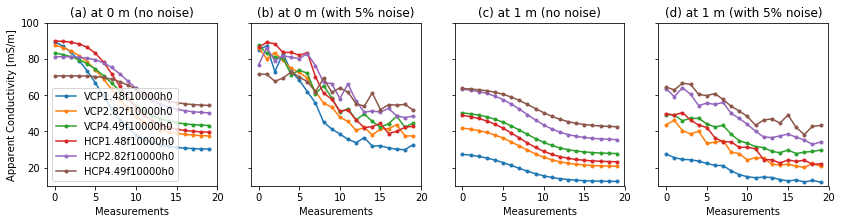

In [3]:
# graph of apparent values
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(14,3))
for i in range(4):
    ax = axs[i]
    ks[i].show(ax=ax, vmin=10, vmax=100)
    ax.set_title('({:s}) {:s}'.format(letters[i], titles[i]))
    if i > 0:
        ax.get_legend().remove()
        ax.set_ylabel('')

In [4]:
# invert
for k in ks:
    k.setInit(depths0=np.array([0.5]), fixedDepths=[False])
    k.invert(method='ROPE', bnds=[(0.1, 3), (10, 30), (80, 120)], rep=200)

#    k.setInit(depths0=np.linspace(0.1, 5, 20))
#    k.invertGN()
    
#    k.setInit(depths0=np.array([0.5, 1]))
#    k.invert(fixedDepths=False)

bounds =  [(0.1, 3), (10, 30), (80, 120)]
Survey 1/1
Starting the ROPE algotrithm with 200 repetitions...
SPOTPY will automatically adjust the number of total repetitions.
Initialize database...
* Database file 'db.csv' created.
10 input vectors with 3 parameters
Generating 26 parameters:
(11, 11)
(21, 21)
(31, 31)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
Stopping samplig
End of sampling
Best run at 86 of 200 (best like=-10.5452) with parameter set:
[ 0.18025442 21.93340386 90.77920322]
Duration:0.39 s
1/20 inverted (ok)Starting the ROPE algotrithm with 200 repetitions...
SPOTPY will automatically adjust the number of tota

10 input vectors with 3 parameters
Generating 26 parameters:
(11, 11)
(21, 21)
(31, 31)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
Stopping samplig
End of sampling
Best run at 141 of 200 (best like=-5.46444) with parameter set:
[ 1.92243422 29.26452193 91.56844203]
Duration:0.38 s
10/20 inverted (ok)Starting the ROPE algotrithm with 200 repetitions...
SPOTPY will automatically adjust the number of total repetitions.
Initialize database...
* Database file 'db.csv' created.
10 input vectors with 3 parameters
Generating 26 parameters:
(11, 11)
(21, 21)
(31, 31)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)


10 input vectors with 3 parameters
Generating 26 parameters:
(11, 11)
(21, 21)
(31, 31)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
Stopping samplig
End of sampling
Best run at 186 of 200 (best like=-2.27935) with parameter set:
[ 2.82620145 22.34603368 81.59710936]
Duration:0.34 s
19/20 inverted (ok)Starting the ROPE algotrithm with 200 repetitions...
SPOTPY will automatically adjust the number of total repetitions.
Initialize database...
* Database file 'db.csv' created.
10 input vectors with 3 parameters
Generating 26 parameters:
(11, 11)
(21, 21)
(31, 31)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)


3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
Stopping samplig
End of sampling
Best run at 99 of 200 (best like=-7.67198) with parameter set:
[ 0.64260307 25.98561282 80.94234487]
Duration:0.38 s
8/20 inverted (ok)Starting the ROPE algotrithm with 200 repetitions...
SPOTPY will automatically adjust the number of total repetitions.
Initialize database...
* Database file 'db.csv' created.
10 input vectors with 3 parameters
Generating 26 parameters:
(11, 11)
(21, 21)
(31, 31)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
3 input vectors with

3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
Stopping samplig
End of sampling
Best run at 199 of 200 (best like=-3.62572) with parameter set:
[ 2.70006589 20.91617431 83.7096876 ]
Duration:0.4 s
17/20 inverted (ok)Starting the ROPE algotrithm with 200 repetitions...
SPOTPY will automatically adjust the number of total repetitions.
Initialize database...
* Database file 'db.csv' created.
10 input vectors with 3 parameters
Generating 26 parameters:
(11, 11)
(21, 21)
(31, 31)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
3 input vectors wit

10 input vectors with 3 parameters
Generating 26 parameters:
(11, 11)
(21, 21)
(31, 31)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
Stopping samplig
End of sampling
Best run at 131 of 200 (best like=-3.79355) with parameter set:
[ 0.59030517 25.47929205 81.28874268]
Duration:0.35 s
6/20 inverted (ok)Starting the ROPE algotrithm with 200 repetitions...
SPOTPY will automatically adjust the number of total repetitions.
Initialize database...
* Database file 'db.csv' created.
10 input vectors with 3 parameters
Generating 26 parameters:
(11, 11)
(21, 21)
(31, 31)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(

3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
Stopping samplig
End of sampling
Best run at 180 of 200 (best like=-2.29513) with parameter set:
[ 2.67821255 14.12915528 81.36736426]
Duration:0.37 s
15/20 inverted (ok)Starting the ROPE algotrithm with 200 repetitions...
SPOTPY will automatically adjust the number of total repetitions.
Initialize database...
* Database file 'db.csv' created.
10 input vectors with 3 parameters
Generating 26 parameters:
(11, 11)
(21, 21)
(31, 31)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
3 input vectors wi

3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
Stopping samplig
End of sampling
Best run at 197 of 200 (best like=-3.96581) with parameter set:
[ 0.60509342 25.62974801 86.87197849]
Duration:0.33 s
4/20 inverted (ok)Starting the ROPE algotrithm with 200 repetitions...
SPOTPY will automatically adjust the number of total repetitions.
Initialize database...
* Database file 'db.csv' created.
10 input vectors with 3 parameters
Generating 26 parameters:
(11, 11)
(21, 21)
(31, 31)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
3 input vectors wit

Stopping samplig
End of sampling
Best run at 113 of 200 (best like=-2.69422) with parameter set:
[ 2.66675953 16.64331101 84.23585557]
Duration:0.4 s
13/20 inverted (ok)Starting the ROPE algotrithm with 200 repetitions...
SPOTPY will automatically adjust the number of total repetitions.
Initialize database...
* Database file 'db.csv' created.
10 input vectors with 3 parameters
Generating 26 parameters:
(11, 11)
(21, 21)
(31, 31)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
3 input vectors with 3 parameters
Generating 26 parameters:
(4, 4)
(7, 7)
(10, 10)
(13, 13)
(16, 16)
(19, 19)
(22, 22)
(25, 25)
(28, 28)
Stopping samplig
End of sampling
Best run at 136 of 200 (best like=-1.7472) with parameter set:
[ 2.81301043 16.01336738 84.45896228]
Duration:0.37 s
14/20 

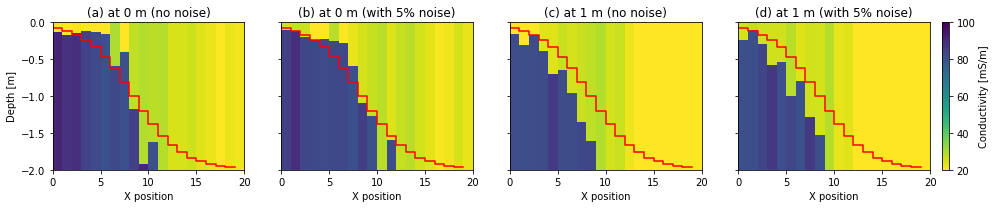

In [5]:
# graph of inverted values
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(14,3))
for i in range(4):
    ax = axs[i]
    ks[i].showResults(ax=ax, vmin=20, vmax=100, maxDepth=2)
    ax.set_title('({:s}) {:s}'.format(letters[i], titles[i]))
    ax.step(np.arange(depths.shape[0]), -depths, 'r') # true depth
    if i < 3:
        fig.axes[-1].remove()
    if i > 0:
        ax.set_ylabel('')
fig.savefig(outputdir + 'inv-noise.jpg', dpi=500)

In [17]:
# graph noise level vs RMSE of predicted depth (takes a long time)
noises = np.linspace(0, 0.1, 10)
def computeRMSE(x, y):
    return np.sqrt(np.sum((x - y)**2)/len(x))
dfrmse = pd.DataFrame(noises, columns=['noise'])
dfrmse['h0'] = np.nan
dfrmse['h1'] = np.nan
for i, coils in zip(['h0','h1'], [coils0, coils1]):
    tmp = []
    for j, noise in enumerate(noises):
        k = Problem()
        k.models = [conds]
        k.depths = [depths]
        dfs = k.forward(forwardModel='FS', coils=coils, noise=noise)
        k.setInit(depths0=np.array([0.5]), fixedDepths=[False])
        k.invert(method='ROPE', bnds=[(10, 30), (80, 120), (0.1, 3)])
#        k.invert(fixedDepths=False)
        dfrmse.loc[j, i] = computeRMSE(depths, k.depths[0].flatten())
        print(dfrmse)

Forward modelling
bounds chosen: [(10, 30), (80, 120), (0.1, 3)]
Survey 1/1

Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 29 of 100 (best like=-7.8853) with parameter set:
[22.00955933 88.39097123  0.15770052]
Duration:0.18 s
1/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 1

13/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 66 of 100 (best like=-3.73451) with parameter set:
[26.12246655 89.32916836  2.45381308]
Duration:0.17 s
14/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13,

5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 93 of 100 (best like=-5.75869) with parameter set:
[18.90877498 84.80081955  0.59197399]
Duration:0.2 s
6/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 paramet

End of sampling
Best run at 59 of 100 (best like=-2.43552) with parameter set:
[24.83145387 84.7156632   2.88971793]
Duration:0.2 s
18/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 42 of 100 (best like=-2.52336) with parameter set:
[18.66003626 85.25109889  2.6840516 ]
Duration:0.19 s
19/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parame

5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 97 of 100 (best like=-3.89322) with parameter set:
[28.74234353 87.87391417  1.96225763]
Duration:0.23 s
11/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 param

5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 53 of 100 (best like=-5.34894) with parameter set:
[25.67177637 82.65876215  0.26152065]
Duration:0.18 s
3/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parame

End of sampling
Best run at 52 of 100 (best like=-3.96449) with parameter set:
[27.39051239 87.98756454  2.72232145]
Duration:0.2 s
15/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 86 of 100 (best like=-2.89359) with parameter set:
[23.82759439 90.27711635  2.72256066]
Duration:0.17 s
16/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parame

2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 91 of 100 (best like=-6.05672) with parameter set:
[16.18471159 80.63754295  0.63674816]
Duration:0.18 s
8/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of s

5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 55 of 100 (best like=-10.99) with parameter set:
[20.57627451 89.69390127  0.29866092]
Duration:0.18 s
1/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 paramete

2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 54 of 100 (best like=-3.55722) with parameter set:
[28.30708769 85.13825469  2.35498147]
Duration:0.18 s
13/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 96 of 100 (best like=-3.08063) with parameter set:
[26.82094004 87.84120858  2.67425324]
Duration:0.18 s
14/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize da

2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 85 of 100 (best like=-5.52821) with parameter set:
[27.53109572 86.19911324  0.72394979]
Duration:0.17 s
5/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 48 of 100 (best like=-6.76478) with parameter set:
[27.50734265 88.64698871  0.81977422]
Duration:0.22 s
6/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize data

2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 77 of 100 (best like=-2.49849) with parameter set:
[26.2228187  83.4372176   2.71557047]
Duration:0.2 s
18/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 96 of 100 (best like=-5.33111) with parameter set:
[20.6082805  82.87868595  2.68546354]
Duration:0.21 s
19/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize dat

2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 9 of 100 (best like=-6.1743) with parameter set:
[24.49401446 94.0940997   2.05221915]
Duration:0.16 s
11/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 50 of 100 (best like=-4.07654) with parameter set:
[23.07730116 82.09856435  1.54663351

5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 40 of 100 (best like=-10.3779) with parameter set:
[21.75511558 84.91256657  0.36381431]
Duration:0.2 s
3/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 paramet

End of sampling
Best run at 91 of 100 (best like=-3.54883) with parameter set:
[28.67246143 88.12378992  2.29448984]
Duration:0.19 s
15/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 61 of 100 (best like=-3.73023) with parameter set:
[25.46646033 81.16256937  2.25316362]
Duration:0.17 s
16/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 param

5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 10 of 100 (best like=-10.5538) with parameter set:
[15.42038819 81.4688445   0.5880981 ]
Duration:0.19 s
8/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parame

bounds chosen: [(10, 30), (80, 120), (0.1, 3)]
Survey 1/1

Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 9 of 100 (best like=-5.40036) with parameter set:
[24.87389875 88.15616128  0.45317136]
Duration:0.18 s
1/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 

End of sampling
Best run at 79 of 100 (best like=-2.04711) with parameter set:
[23.52510524 83.69872482  2.66713844]
Duration:0.19 s
13/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 55 of 100 (best like=-2.48254) with parameter set:
[19.16677299 90.14695693  2.78503401]
Duration:0.18 s
14/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 param

(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 71 of 100 (best like=-3.55977) with parameter set:
[23.2515489  81.14799749  0.89320282]
Duration:0.22 s
5/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 52 of 100 (best like=-2.96558) with parameter set:
[28.50306988 80.72158329  1.17997294]
Duration:0.2 s
6/20 inverted (ok)
Starting the ROPE algot

End of sampling
Best run at 57 of 100 (best like=-2.82538) with parameter set:
[13.22606627 86.42174999  2.82747297]
Duration:0.19 s
17/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 90 of 100 (best like=-2.17579) with parameter set:
[19.06872995 81.60529473  2.68569148]
Duration:0.18 s
18/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 param

2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 42 of 100 (best like=-2.65341) with parameter set:
[23.63311626 84.88319811  2.03176146]
Duration:0.18 s
10/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of 

5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 42 of 100 (best like=-4.97172) with parameter set:
[19.21448422 83.60857697  0.60027006]
Duration:0.2 s
2/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 paramet

End of sampling
Best run at 53 of 100 (best like=-2.07376) with parameter set:
[20.2254639  84.88545301  2.55575129]
Duration:0.19 s
14/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 80 of 100 (best like=-3.0345) with parameter set:
[15.56216839 81.09513068  2.27193654]
Duration:0.22 s
15/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parame

End of sampling
Best run at 55 of 100 (best like=-2.41132) with parameter set:
[23.3895062  86.13315739  1.35594246]
Duration:0.15 s
7/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 27 of 100 (best like=-2.94016) with parameter set:
[26.12687336 86.43390889  2.00831717]
Duration:0.18 s
8/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 paramet

5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 51 of 100 (best like=-1.82395) with parameter set:
[14.86961341 82.41443823  2.88836959]
Duration:0.22 s
20/20 inverted (ok)
20 measurements inverted

      noise        h0        h1
0  0.000000  5.249352  6.454790
1  0.011111  5.622114  6.162690
2  0.022222  5.041182  6.309947
3  0.033333  5.612771  5.979996
4  0.044444  4.935647  5.760192
5  0.055556  5.290268       NaN
6  0.066667  5.185698       NaN
7  0.077778  5.360696       NaN
8  0.088889  5.300782       NaN
9  0.100000  5.385693       NaN
Forward modelling
bounds chosen: [(10, 30), (80, 120), (0.1, 3)]
S

End of sampling
Best run at 16 of 100 (best like=-4.34218) with parameter set:
[19.34894688 88.83166344  2.76550296]
Duration:0.19 s
11/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 61 of 100 (best like=-2.49163) with parameter set:
[25.25031414 81.41656338  2.66027451]
Duration:0.18 s
12/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 param

2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 56 of 100 (best like=-7.73042) with parameter set:
[26.65302182 82.42785848  0.75223367]
Duration:0.19 s
3/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of s

2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 67 of 100 (best like=-0.63429) with parameter set:
[21.54335991 81.99421426  2.5949357 ]
Duration:0.18 s
15/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 68 of 100 (best like=-3.36729) with parameter set:
[15.92406437 82.24960993  2.65754871]
Duration:0.18 s
16/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize da

2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 84 of 100 (best like=-3.99498) with parameter set:
[25.8189471  86.32061525  1.80051379]
Duration:0.18 s
7/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 80 of 100 (best like=-4.7538) with parameter set:
[29.35851025 82.85788766  2.40239866]
Duration:0.18 s
8/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize datab

5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 69 of 100 (best like=-4.49487) with parameter set:
[10.9844461  90.1272723   2.74542519]
Duration:0.2 s
20/20 inverted (ok)
20 measurements inverted

      noise        h0        h1
0  0.000000  5.249352  6.454790
1  0.011111  5.622114  6.162690
2  0.022222  5.041182  6.309947
3  0.033333  5.612771  5.979996
4  0.044444  4.935647  5.760192
5  0.055556  5.290268  6.353349
6  0.066667  5.185698  6.222019
7  0.077778  5.360696  6.192185
8  0.088889  5.300782       NaN
9  0.100000  5.385693       NaN
Forward modelling
bounds chosen: [(10, 30), (80, 120), (0.1, 3)]
Su

End of sampling
Best run at 54 of 100 (best like=-2.57267) with parameter set:
[25.06830629 84.84906884  2.49279689]
Duration:0.18 s
11/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 30 of 100 (best like=-4.13557) with parameter set:
[22.31468162 92.36912798  2.6924316 ]
Duration:0.18 s
12/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 param

2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 39 of 100 (best like=-6.64018) with parameter set:
[22.40274246 85.05430291  1.34981228]
Duration:0.18 s
3/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of s

2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 92 of 100 (best like=-1.01887) with parameter set:
[19.89503628 84.57767462  2.79269388]
Duration:0.18 s
16/20 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of 

Text(0, 0.5, 'RMSE of depth [m]')

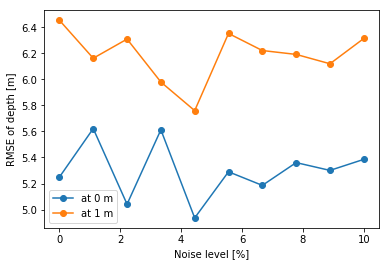

In [18]:
fig, ax = plt.subplots()
ax.plot(dfrmse['noise']*100, dfrmse['h0'], 'o-', label='at 0 m')
ax.plot(dfrmse['noise']*100, dfrmse['h1'], 'o-', label='at 1 m')
ax.legend()
ax.set_xlabel('Noise level [%]')
ax.set_ylabel('RMSE of depth [m]')

### Obervations
- Increasing the depth of 1 m above the ground make it much more difficult to define the boundary between the layers. Even more when the noise level of the measurements increase.
- at 1 m is always worse but there is no substantial increase of RMSE with noise level

## Time-lapse field application - Guillaume 
- Soil moisture content evolution vs EMI timelapse inversion 
- Quebec data, warren data or synthetic 

In [6]:
fnames = [
#        datadir + 'timelapse-wheat/161028.csv',
#        datadir + 'timelapse-wheat/170302.csv',
        datadir + 'timelapse-wheat/170316.csv',
        datadir + 'timelapse-wheat/170403.csv',
        datadir + 'timelapse-wheat/170427.csv',
        datadir + 'timelapse-wheat/170516.csv',
#        datadir + 'timelapse-wheat/170601.csv'
        ]

k = Problem()
k.createTimeLapseSurvey(fnames)
# just look at a few measurements for better graph
for s in k.surveys:
    s.df = s.df[:30]
    s.name = datetime.strptime('20' + s.name, '%Y%m%d').strftime('%Y-%m-%d')

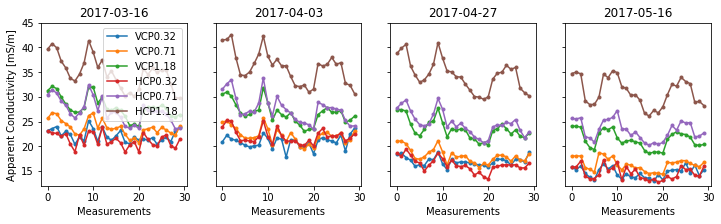

In [7]:
# graph of apparent conductivities
fig, axs = plt.subplots(1, 4, figsize=(12, 3), sharex=True, sharey=True)
axs = axs.flatten()
for i, s in enumerate(k.surveys):
    ax = axs[i]
    k.show(i, ax=ax, vmin=12, vmax=45)
    ax.set_title(s.name)
    if i > 0:
        ax.set_ylabel('')
        ax.get_legend().remove()

In [8]:
# absolute inversion
#k.invert()
k.setInit(depths0=np.linspace(0.1, 2, 20))
k.invertGN()
#k.invertMCMC(fixedDepths=False)

Survey 1/4
30 measurements inverted
Survey 2/4
30 measurements inverted
Survey 3/4
30 measurements inverted
Survey 4/4
30 measurements inverted


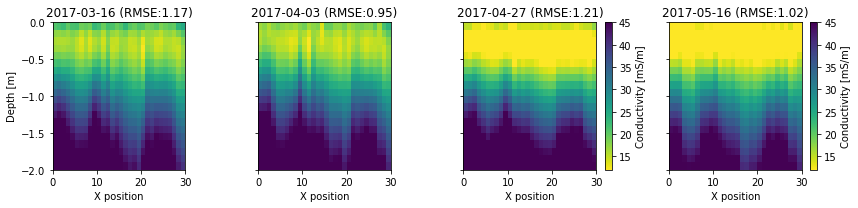

In [9]:
# graph of inverted conductivities
rmse = k.getRMSE()
fig, axs = plt.subplots(1, 4, figsize=(12, 3), sharex=True, sharey=True)
axs = axs.flatten()
for i, s in enumerate(k.surveys):
    ax = axs[i]
    k.showResults(i, ax=ax, vmin=12, vmax=45, maxDepth=2)
    ax.set_title('{:s} (RMSE:{:.2f})'.format(s.name, rmse['all'].values[i]))
    if i < 2:
        fig.axes[-1].remove()
    if i > 0:
        ax.set_ylabel('')

In [11]:
# absolute inversion
k.setInit(depths0=np.array([0.7]), fixedDepths=[False])
k.invert(method='ROPE')

bounds =  [(0.2, 0.8999999999999999), (2.0, 100.0), (2.0, 100.0)]
Survey 1/4
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'db.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 90 of 100 (best like=-1.51656) with parameter set:
[ 0.80107649 17.40337346 54.17486249]
Duration:0.16 s
1/30 inverted (ok)Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'db.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 

End of sampling
Best run at 97 of 100 (best like=-1.7916) with parameter set:
[ 0.47833795 16.73514707 44.19701075]
Duration:0.2 s
13/30 inverted (ok)Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'db.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 58 of 100 (best like=-1.79981) with parameter set:
[ 0.72178948 14.81335612 45.24420793]
Duration:0.19 s
14/30 inverted (ok)Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'db.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)

End of sampling
Best run at 57 of 100 (best like=-1.30742) with parameter set:
[ 0.79386917 18.92834453 44.06579515]
Duration:0.2 s
26/30 inverted (ok)Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'db.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 91 of 100 (best like=-1.43451) with parameter set:
[ 0.73931772 18.03904165 43.59722774]
Duration:0.18 s
27/30 inverted (ok)Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'db.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11

2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 48 of 100 (best like=-2.52396) with parameter set:
[ 0.44572265  9.15695964 47.53084488]
Duration:0.2 s
9/30 inverted (ok)Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'db.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 72 of 100 (best like=-2.41762) with parameter set:
[ 0.65389774 12.13360333 60.89316963]
Duration:0.21 s
10/30 inverted (ok)Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* D

2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 66 of 100 (best like=-1.58949) with parameter set:
[ 0.79353386 14.74267476 53.98573829]
Duration:0.18 s
22/30 inverted (ok)Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'db.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 96 of 100 (best like=-1.4531) with parameter set:
[ 0.58280649 18.20728852 39.18544703]
Duratio

2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 70 of 100 (best like=-2.52404) with parameter set:
[ 0.61461069 13.64858273 35.68721357]
Duration:0.18 s
5/30 inverted (ok)Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'db.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 88 of 100 (best like=-1.85298) with parameter set:
[ 0.5109092  11.79501123 35.85468608]
Duratio

2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 67 of 100 (best like=-1.99649) with parameter set:
[ 0.58479176 11.1349742  33.97881164]
Duration:0.21 s
18/30 inverted (ok)Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'db.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 64 of 100 (best like=-1.82015) with parameter set:
[ 0.62095973 10.16179634 35.35787348]
Duration:0.21 s
19/30 inverted (ok)Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
*

2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 93 of 100 (best like=-1.96736) with parameter set:
[ 0.54705687 10.37136723 43.30232514]
Duration:0.19 s
1/30 inverted (ok)Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'db.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Be

2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 93 of 100 (best like=-1.21665) with parameter set:
[ 0.64901255  9.169231   37.65795874]
Duration:0.2 s
14/30 inverted (ok)Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'db.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 96 of 100 (best like=-1.41027) with parameter set:
[ 0.71092234  6.65027402 46.48661439]
Duration:0.2 s
15/30 inverted (ok)Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* D

2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 44 of 100 (best like=-1.76013) with parameter set:
[ 0.46994393  8.98600147 33.96851881]
Duration:0.21 s
27/30 inverted (ok)Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'db.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 65 of 100 (best like=-1.84549) with parameter set:
[ 0.51518546  9.74048064 32.0227314 ]
Durati

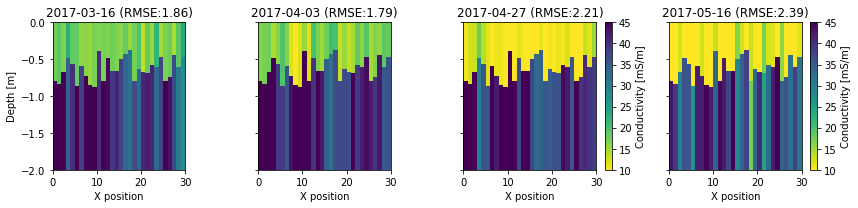

In [13]:
# graph of inverted conductivities
rmse = k.getRMSE()
fig, axs = plt.subplots(1, 4, figsize=(12, 3), sharex=True, sharey=True)
for i, s in enumerate(k.surveys):
    ax = axs[i]
    k.showResults(i, ax=ax, vmin=10, vmax=45, maxDepth=2)
    ax.set_title('{:s} (RMSE:{:.2f})'.format(s.name, rmse['all'].values[i]))
    if i < 2:
        fig.axes[-1].remove()
    if i > 0:
        ax.set_ylabel('')

In [14]:
# inversion of change
k = Problem()
k.createTimeLapseSurvey(fnames)
for s in k.surveys:
    s.df = s.df[:30]
    s.name = datetime.strptime('20' + s.name, '%Y%m%d').strftime('%Y-%m-%d')
    
k.setInit(depths0=np.linspace(0.1, 2, 20))
#k.setInit(depths0=np.array([0.3, 0.7]))
for s in k.surveys[1:]:
    s.df.loc[:, k.coils] = s.df[k.coils].values - k.surveys[0].df[k.coils].values
#k.invert(beta=0.1)
k.invertGN()

Survey 1/4
30 measurements inverted
Survey 2/4
30 measurements inverted
Survey 3/4
30 measurements inverted
Survey 4/4
30 measurements inverted


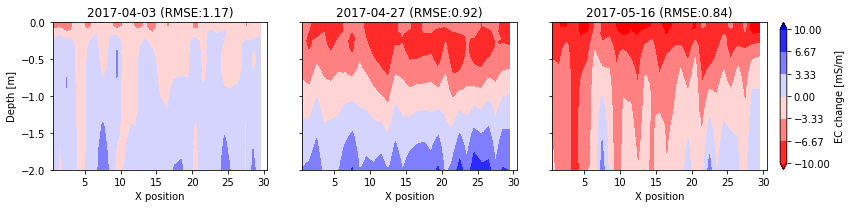

In [15]:
# graph of inverted conductivities change relative to background
rmse = k.getRMSE()
fig, axs = plt.subplots(1, 3, figsize=(12, 3), sharex=True, sharey=True)
axs = axs.flatten()
for i, s in enumerate(k.surveys[1:]):
    ax = axs[i]
    k.showResults(i+1, ax=ax, vmin=-10, vmax=10, cmap='bwr_r', contour=True, maxDepth=2)
    ax.set_title('{:s} (RMSE:{:.2f})'.format(s.name, rmse['all'].values[i]))
    if i < 2:
        fig.axes[-1].remove()
    else:
        fig.axes[-1].set_ylabel('EC change [mS/m]')
    if i > 0:
        ax.set_ylabel('')
fig.savefig(outputdir + 'inv-timelapse.jpg', dpi=500)

## Different types of inversions

In [16]:
# Gauss-Newton
k1 = Problem()
k1.createSurvey(datadir + 'cover-crop/coverCrop.csv')
k1.setInit(depths0=np.linspace(0.1, 2, 20))
k1.surveys[0].df = k1.surveys[0].df[:20]
k1.invertGN()

# Minimize
k2 = Problem()
k2.createSurvey(datadir + 'cover-crop/coverCrop.csv')
k2.setInit(depths0=np.array([0.3, 0.7]), fixedDepths=[True, True])
k2.surveys[0].df = k2.surveys[0].df[:20]
k2.invert(method='L-BFGS-B')

# MCMC
k3 = Problem()
k3.createSurvey(datadir + 'cover-crop/coverCrop.csv')
k3.setInit(depths0=np.array([0.7]), fixedDepths=[False])
k3.surveys[0].df = k3.surveys[0].df[:20]
k3.invert(method='ROPE')

ks = [k1, k2, k3]

Survey 1/1
20 measurements inverted
bounds =  None
Survey 1/1
20 measurements inverted (20 converged)
bounds =  [(0.2, 0.8999999999999999), (2.0, 100.0), (2.0, 100.0)]
Survey 1/1
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'db.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 70 of 100 (best like=-1.01107) with parameter set:
[ 0.82850937 29.29564016 56.98008172]
Duration:0.18 s
1/20 inverted (ok)Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'db.csv' created.
5 input vectors with 3 parameters
Generating 12

2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 93 of 100 (best like=-1.38907) with parameter set:
[ 0.53594786 23.02031108 36.54052584]
Duration:0.17 s
13/20 inverted (ok)Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'db.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
B

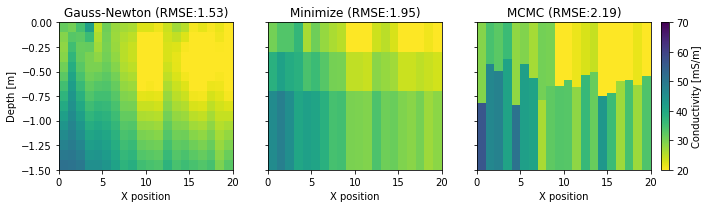

In [18]:
# graph
methods = ['Gauss-Newton', 'Minimize', 'MCMC'] # TODO put exact names
fig, axs = plt.subplots(1, 3, figsize=(10,3), sharex=True, sharey=True)
for i, k in enumerate(ks):
    ax = axs[i]
    k.showResults(ax=ax, vmin=20, vmax=70, maxDepth=1.5)
    if i < 2:
        fig.axes[-1].remove()
    if i > 0:
        ax.set_ylabel('')
    rmse = k.getRMSE()
    ax.set_title('{:s} (RMSE:{:.2f})'.format(methods[i], rmse['all'].values[0]))
fig.savefig(outputdir + 'inversion-types.jpg', dpi=500)

number of nan 0 0
number of nan 0 0
number of nan 0 0


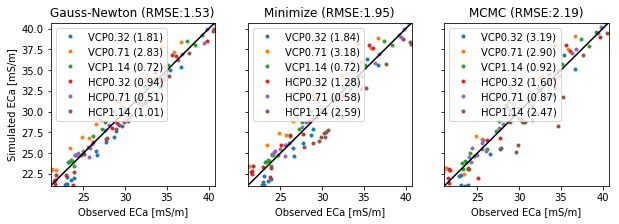

In [19]:
# graph of one2one
fig, axs = plt.subplots(1, 3, figsize=(10,3), sharex=True, sharey=True)
for i, k in enumerate(ks):
    ax = axs[i]
    k.showOne2one(ax=ax)
    if i > 0:
        ax.set_ylabel('')
    rmse = k.getRMSE()
    ax.set_title('{:s} (RMSE:{:.2f})'.format(methods[i], rmse['all'].values[0]))

## Capabilities of EMagPy

Deleted 13/60 measurements
dataset shrunk of 2 measurements
VCP0.32 0.59 * x + 1.71 (R=0.35)
VCP0.71 0.53 * x + 2.34 (R=0.54)
VCP1.18 0.40 * x + 6.66 (R=0.24)
HCP0.32 0.38 * x + 6.51 (R=0.52)
HCP0.71 0.22 * x + 10.44 (R=0.22)
HCP1.18 0.06 * x + 13.11 (R=0.10)
Transformation to LIN ECa for CMD Mini-Explorer at F-0m calibration
found 766 / 3792 crossing points
bounds =  None
Survey 1/1
45 measurements inverted (45 converged)
number of nan 0 0


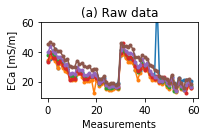

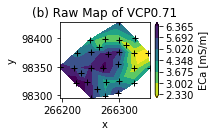

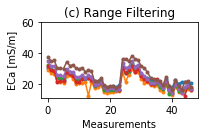

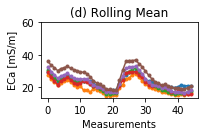

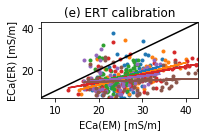

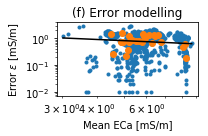

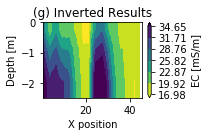

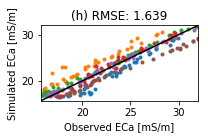

In [20]:
k = Problem()
k.createSurvey(datadir + 'cover-crop/coverCrop.csv')
k.surveys[0].df = k.surveys[0].df[:60]
#k.coils = k.coils[:3] # just VCP
#k.surveys[0].coils = k.surveys[0].coils[:3]
figsize = (3,2)

# data display
fig, ax = plt.subplots(figsize=figsize)
k.show(ax=ax, vmax=60)
ax.get_legend().remove()
ax.set_title('(a) Raw data')
ax.set_ylabel('ECa [mS/m]')
fig.tight_layout()
fig.savefig(outputdir + 'cap-show.jpg')

# data map
fig, ax = plt.subplots(figsize=figsize)
k2 = Problem()
k2.createSurvey(datadir + 'saprolite/regolith.csv')
k2.convertFromNMEA()
k2.showMap(coil=k2.coils[1], ax=ax, contour=True, pts=True)
ax.set_title('(b) Raw Map of VCP0.71')
fig.axes[-1].set_ylabel('ECa [mS/m]')
fig.tight_layout()
fig.savefig(outputdir + 'cap-showMap.jpg')


# filter range
fig, ax = plt.subplots(figsize=figsize)
k.keepBetween(vmin=10, vmax=40)
k.show(ax=ax, vmax=60)
ax.get_legend().remove()
ax.set_title('(c) Range Filtering')
ax.set_ylabel('ECa [mS/m]')
fig.tight_layout()
fig.savefig(outputdir + 'cap-filterRange.jpg')

# filter pick
#fig, ax = plt.subplots()
#k.show(ax=ax, vmax=60)
#fig.savefig(outputdir + 'cap-filterPick.jpg')

# filter smooth
fig, ax = plt.subplots(figsize=figsize)
k.rollingMean()
k.show(ax=ax, vmax=60)
ax.set_title('(d) Rolling Mean')
ax.get_legend().remove()
ax.set_ylabel('ECa [mS/m]')
fig.tight_layout()
fig.savefig(outputdir + 'cap-smooth.jpg')


# ERT calibration
fig, ax = plt.subplots(figsize=figsize)
k.calibrate(datadir + 'calib/dfeca.csv', datadir + 'calib/dfec.csv', ax=ax)
ax.get_legend().remove()
ax.set_title('(e) ERT calibration')
fig.tight_layout()
fig.savefig(outputdir + 'cap-calib.jpg')

# EMI error modelling
k2 = Problem() # need other dataset as cover-crop doesn't have cross-over points
k2.importGF(fnameLo = datadir + 'potatoes/potatoesLo.dat')
k2.convertFromNMEA()
fig, ax = plt.subplots(figsize=figsize)
k2.crossOverPoints(ax=ax, coil=k.coils[1])
ax.set_title('(f) Error modelling')
ax.get_legend().remove()
ax.set_xlabel('Mean ECa [mS/m]')
fig.tight_layout()
fig.savefig(outputdir + 'cap-error.jpg')


# Inverse results
fig, ax = plt.subplots(figsize=figsize)
k.invert()
k.showResults(ax=ax, contour=True)
ax.set_title('(g) Inverted Results')
fig.axes[-1].set_ylabel('EC [mS/m]')
fig.tight_layout()
fig.savefig(outputdir + 'cap-showResults.jpg')

# Inverse quality
fig, ax = plt.subplots(figsize=figsize)
k.showOne2one(ax=ax)
ax.get_legend().remove()
ax.set_title('(h) ' + ax.get_title())
fig.tight_layout()
fig.savefig(outputdir + 'cap-one2one.jpg')

In [3]:
depths = 0 + 2/(1+np.exp(-4*(x-1)))

NameError: name 'x' is not defined

array([[0.05319399],
       [0.14972549],
       [0.38664274],
       [0.83023122],
       [1.35524064],
       [1.72318291],
       [1.89709626],
       [1.96402758]])